In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 7)
import pandas as pd

import random
import math

In [2]:
Data = pd.read_excel("DATOS FINAL.xlsx")
Data

,YEAR,Nombre Institución,Participación Prima Directa,Prima Directa,Incremento neto a reserva de riesgos en curso,Prima de retención devengada,Costo de adquisición,Costo de siniestralidad,Utilidad (Pérdida) técnica,Utilidad (Pérdida) bruta,Costo de operación,Utilidad (Pérdida) por operación,Resultado integral de Financ. Prod. Financieros,Utilidad (Pérdida) antes de imp,Utilidad (Pérdida) antes de op. Discont,Utilidad (Pérdida) del ejercicio
0,2020,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.021568,6.806567e+05,59496.66407,4.801058e+05,140045.19022,2.314720e+05,1.085886e+05,1.085886e+05,43715.28417,6.487336e+04,12494.92897,7.736829e+04,5.417415e+04,5.417415e+04
1,2020,"AIG Seguros México, S.A. de C.V.",0.004163,1.313611e+05,-43679.96792,1.442656e+05,15022.79614,5.786950e+04,7.137332e+04,8.121194e+04,46921.77164,3.429017e+04,90211.32159,1.245015e+05,9.315352e+04,9.315352e+04
2,2020,"Allianz México, S.A., Compañía de Seguros",0.000772,2.437593e+04,1211.13948,2.316479e+04,2363.14459,1.620274e+04,4.598910e+03,4.598910e+03,4233.76442,3.651455e+02,-1743.93857,-1.389014e+03,-1.166900e+03,-1.166900e+03
3,2020,"Assurant Daños México, S.A.",0.000032,1.021356e+03,210.20872,3.109600e+01,-156.00725,-6.259911e+01,2.497024e+02,2.497024e+02,287.88590,-3.818354e+01,-0.96732,-3.915086e+01,-4.296743e+01,-4.296743e+01
4,2020,AXA Seguros,0.092480,2.918502e+06,88986.71015,2.827893e+06,357394.09308,1.411360e+06,1.059139e+06,1.059139e+06,47874.93854,1.011264e+06,300520.94662,1.299001e+06,1.070068e+06,1.070068e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2001,Seguros Multiva,0.002196,5.578400e+04,5090.00000,5.067300e+04,11981.00000,3.472700e+04,3.966000e+03,3.742000e+03,3912.00000,-1.700000e+02,4855.00000,4.686000e+03,5.130000e+02,4.173000e+03
516,2001,"Sompo Seguros México, S.A. de C.V.",0.000078,1.975000e+03,-14991.00000,2.251200e+04,7264.00000,1.842300e+04,7.919000e+03,7.919000e+03,4166.00000,9.301000e+03,2213.00000,5.966000e+03,5.409000e+03,6.104000e+03
517,2001,"Tokio Marine, Compañía de Seguros, S.A. de C.V.",0.012894,3.274660e+05,34982.00000,2.923820e+05,93695.00000,2.330960e+05,-3.440900e+04,-3.754500e+04,27794.00000,-6.534000e+04,16677.00000,-4.866300e+04,7.600000e+01,-4.873900e+04
518,2001,Seguros Santander,0.000274,6.952000e+03,482.00000,6.470000e+03,1652.00000,3.453000e+03,1.365000e+03,1.304000e+03,791.00000,5.130000e+02,38.00000,5.500000e+02,3.210000e+02,2.290000e+02


In [9]:
MS=Data['Participación Prima Directa']
MS


0      0.021568
1      0.004163
2      0.000772
3      0.000032
4      0.092480
         ...   
515    0.002196
516    0.000078
517    0.012894
518    0.000274
519    0.065525
Name: Participación Prima Directa, Length: 520, dtype: float64

In [10]:
DatosYear=Data['YEAR']
DatosYear

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
515    2001
516    2001
517    2001
518    2001
519    2001
Name: YEAR, Length: 520, dtype: int64

In [11]:
del Data['Nombre Institución']
del Data['Participación Prima Directa']
del Data['Prima Directa']

del Data['YEAR']
Data

,Incremento neto a reserva de riesgos en curso,Prima de retención devengada,Costo de adquisición,Costo de siniestralidad,Utilidad (Pérdida) técnica,Utilidad (Pérdida) bruta,Costo de operación,Utilidad (Pérdida) por operación,Resultado integral de Financ. Prod. Financieros,Utilidad (Pérdida) antes de imp,Utilidad (Pérdida) antes de op. Discont,Utilidad (Pérdida) del ejercicio
0,59496.66407,4.801058e+05,140045.19022,2.314720e+05,1.085886e+05,1.085886e+05,43715.28417,6.487336e+04,12494.92897,7.736829e+04,5.417415e+04,5.417415e+04
1,-43679.96792,1.442656e+05,15022.79614,5.786950e+04,7.137332e+04,8.121194e+04,46921.77164,3.429017e+04,90211.32159,1.245015e+05,9.315352e+04,9.315352e+04
2,1211.13948,2.316479e+04,2363.14459,1.620274e+04,4.598910e+03,4.598910e+03,4233.76442,3.651455e+02,-1743.93857,-1.389014e+03,-1.166900e+03,-1.166900e+03
3,210.20872,3.109600e+01,-156.00725,-6.259911e+01,2.497024e+02,2.497024e+02,287.88590,-3.818354e+01,-0.96732,-3.915086e+01,-4.296743e+01,-4.296743e+01
4,88986.71015,2.827893e+06,357394.09308,1.411360e+06,1.059139e+06,1.059139e+06,47874.93854,1.011264e+06,300520.94662,1.299001e+06,1.070068e+06,1.070068e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
515,5090.00000,5.067300e+04,11981.00000,3.472700e+04,3.966000e+03,3.742000e+03,3912.00000,-1.700000e+02,4855.00000,4.686000e+03,5.130000e+02,4.173000e+03
516,-14991.00000,2.251200e+04,7264.00000,1.842300e+04,7.919000e+03,7.919000e+03,4166.00000,9.301000e+03,2213.00000,5.966000e+03,5.409000e+03,6.104000e+03
517,34982.00000,2.923820e+05,93695.00000,2.330960e+05,-3.440900e+04,-3.754500e+04,27794.00000,-6.534000e+04,16677.00000,-4.866300e+04,7.600000e+01,-4.873900e+04
518,482.00000,6.470000e+03,1652.00000,3.453000e+03,1.365000e+03,1.304000e+03,791.00000,5.130000e+02,38.00000,5.500000e+02,3.210000e+02,2.290000e+02


In [12]:
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler

In [13]:
Y_Test=MS[0:104]
Y_Train=MS[104:]
X_Test=Data[0:104]
X_Train=Data[104:]

In [14]:
Y_Test

0      0.021568
1      0.004163
2      0.000772
3      0.000032
4      0.092480
         ...   
99     0.001670
100    0.010839
101    0.000018
102    0.000160
103    0.037363
Name: Participación Prima Directa, Length: 104, dtype: float64

In [15]:
Y_Train

104    0.012388
105    0.000016
106    0.005429
107    0.000778
108    0.000000
         ...   
515    0.002196
516    0.000078
517    0.012894
518    0.000274
519    0.065525
Name: Participación Prima Directa, Length: 416, dtype: float64

In [16]:
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)
X_Test_scaled = scaler.transform(X_Test)

In [17]:
modeloUni = Sequential()
modeloUni.add(Dense(16,activation='sigmoid',input_shape=(12,)))
modeloUni.add(Dense(32, activation='sigmoid'))
modeloUni.add(Dense(150, activation='sigmoid'))
modeloUni.add(Dropout(0.25))
modeloUni.add(Dense(120, activation='sigmoid'))
modeloUni.add(Dropout(0.25))
modeloUni.add(Dense(8, activation='sigmoid'))
modeloUni.add(Dropout(0.25))
modeloUni.add(Dense(units=1, activation='sigmoid'))
modeloUni.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 150)               4950      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               18120     
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 9

In [ ]:
modeloUni = Sequential()
modeloUni.add(Dense(16,activation='sigmoid',input_shape=(12,)))
modeloUni.add(Dense(32, activation='sigmoid'))
modeloUni.add(Dense(150, activation='sigmoid'))
modeloUni.add(Dropout(0.25))
modeloUni.add(Dense(120, activation='sigmoid'))
modeloUni.add(Dropout(0.25))
modeloUni.add(Dense(8, activation='sigmoid'))
modeloUni.add(Dropout(0.25))
modeloUni.add(Dense(units=1, activation='sigmoid'))
modeloUni.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 16)                208       
                                                                 
 dense_39 (Dense)            (None, 32)                544       
                                                                 
 dense_40 (Dense)            (None, 150)               4950      
                                                                 
 dropout_18 (Dropout)        (None, 150)               0         
                                                                 
 dense_41 (Dense)            (None, 120)               18120     
                                                                 
 dropout_19 (Dropout)        (None, 120)               0         
                                                                 
 dense_42 (Dense)            (None, 8)                

In [18]:
random.seed(250)
Batch_size = 10
modeloUni.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
#early_stop = EarlyStopping(monitor='mean_squared_error', min_delta=0.000000001, patience=15, verbose=1)
#modeloUni.fit(X_Train_scaled, Y_Train, epochs=300, batch_size=Batch_size, verbose=1,callbacks=[early_stop]);
modeloUni.fit(X_Train_scaled, Y_Train, epochs=300, batch_size=Batch_size, verbose=1);

Epoch 1/300
42/42 [==============================] - 2s 3ms/step - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 2/300
42/42 [==============================] - 0s 3ms/step - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 3/300
42/42 [==============================] - 0s 3ms/step - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 4/300
42/42 [==============================] - 0s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 5/300
42/42 [==============================] - 0s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6/300
42/42 [==============================] - 0s 3ms/step - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 7/300
42/42 [==============================] - 0s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 8/300
42/42 [==============================] - 0s 3ms/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 9/300
42/42 [==============================] - 0s 3ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 10/300
42/42 

In [ ]:
modeloUni.get_weight_paths()

{'dense.kernel': <tf.Variable 'dense/kernel:0' shape=(12, 16) dtype=float32, numpy=
 array([[-2.85468131e-01, -4.23593730e-01,  1.61782503e-01,
          2.15754896e-01,  6.42147541e-01,  2.28725031e-01,
          1.97605431e-01,  4.77261655e-02, -5.61777055e-01,
          1.65303648e-01,  7.92676508e-01,  3.03176403e-01,
          6.00614324e-02, -7.03028023e-01, -1.65033728e-01,
          9.60108936e-02],
        [-5.65320909e-01, -7.50204563e-01, -5.90969145e-01,
          9.03052986e-01, -1.05726719e+00,  5.86510181e-01,
         -1.17979312e+00,  1.49108648e+00, -5.80906272e-01,
          8.45727623e-01,  7.51237214e-01, -5.02322838e-02,
         -1.09748733e+00, -9.57675874e-02, -1.60160691e-01,
         -6.80928528e-01],
        [-7.67469764e-01, -9.06744301e-01,  8.71934950e-01,
          6.17741585e-01,  2.02480480e-02,  1.74061269e-01,
         -1.33749855e+00,  2.62255728e-01, -1.67865500e-01,
         -5.42897642e-01,  1.78604111e-01,  6.34655476e-01,
         -8.71931374e-

In [ ]:
pesos=modeloUni.get_weight_paths()

In [ ]:
pesos.keys

<function dict.keys>

In [ ]:
pesos

{'dense.kernel': <tf.Variable 'dense/kernel:0' shape=(12, 16) dtype=float32, numpy=
 array([[-2.85468131e-01, -4.23593730e-01,  1.61782503e-01,
          2.15754896e-01,  6.42147541e-01,  2.28725031e-01,
          1.97605431e-01,  4.77261655e-02, -5.61777055e-01,
          1.65303648e-01,  7.92676508e-01,  3.03176403e-01,
          6.00614324e-02, -7.03028023e-01, -1.65033728e-01,
          9.60108936e-02],
        [-5.65320909e-01, -7.50204563e-01, -5.90969145e-01,
          9.03052986e-01, -1.05726719e+00,  5.86510181e-01,
         -1.17979312e+00,  1.49108648e+00, -5.80906272e-01,
          8.45727623e-01,  7.51237214e-01, -5.02322838e-02,
         -1.09748733e+00, -9.57675874e-02, -1.60160691e-01,
         -6.80928528e-01],
        [-7.67469764e-01, -9.06744301e-01,  8.71934950e-01,
          6.17741585e-01,  2.02480480e-02,  1.74061269e-01,
         -1.33749855e+00,  2.62255728e-01, -1.67865500e-01,
         -5.42897642e-01,  1.78604111e-01,  6.34655476e-01,
         -8.71931374e-

In [ ]:
import pandas as pd
with pd.ExcelWriter('PesosRed.xlsx') as writer:
    # Itera sobre las claves y valores del diccionario
    for nombre_hoja, vector in pesos.items():
        # Crea un DataFrame para cada vector
        df = pd.DataFrame({nombre_hoja: vector})
        # Guarda el DataFrame en una hoja del archivo Excel
        df.to_excel(writer, sheet_name=nombre_hoja, index=False)

In [19]:
Y_Predict_Test=modeloUni.predict(X_Test_scaled)
Y_Predict_Train=modeloUni.predict(X_Train_scaled)
Y_Predict_Train

13/13 [==============================] - 0s 4ms/step


array([[0.0104865 ],
       [0.00148776],
       [0.00429654],
       [0.00153333],
       [0.00148747],
       [0.13664135],
       [0.06082358],
       [0.00307012],
       [0.03240154],
       [0.14874668],
       [0.06061867],
       [0.00162885],
       [0.07051247],
       [0.26444286],
       [0.02375957],
       [0.05338399],
       [0.00192711],
       [0.06552409],
       [0.04703616],
       [0.00356584],
       [0.05878741],
       [0.00177763],
       [0.00144423],
       [0.0043725 ],
       [0.00150665],
       [0.03872613],
       [0.00705129],
       [0.00616959],
       [0.00152249],
       [0.00146271],
       [0.15127459],
       [0.05837718],
       [0.00323951],
       [0.0448573 ],
       [0.16248241],
       [0.0592665 ],
       [0.00155016],
       [0.06583846],
       [0.24756216],
       [0.01673735],
       [0.04945461],
       [0.00177369],
       [0.0648127 ],
       [0.05086666],
       [0.00288396],
       [0.08223719],
       [0.00180616],
       [0.001

In [20]:
def estand(datos,n):
  for i in range(0, datos.shape[0], n):
    suma=sum(datos[i:i+n])
    for j in range(i,i+n):
       datos[j]=datos[j]/suma
  return(datos)

In [ ]:
list(range(0, Y_Predict_Test.shape[0], 26))

[0, 26, 52, 78, 104, 130, 156, 182, 208, 234, 260, 286, 312, 338, 364, 390]

In [ ]:
list(range(0, Y_Predict_Train.shape[0], 26))

[0, 26, 52, 78, 104]

In [ ]:
Y_Predict_Test.shape

(416, 1)

In [ ]:
Y_Predict_Train.shape

(130, 1)

In [21]:
estand(Y_Predict_Test,26)
estand(Y_Predict_Train,26)

array([[0.00953328],
       [0.00135252],
       [0.00390598],
       [0.00139395],
       [0.00135226],
       [0.12422065],
       [0.05529471],
       [0.00279105],
       [0.02945624],
       [0.13522561],
       [0.05510842],
       [0.00148079],
       [0.06410288],
       [0.240405  ],
       [0.02159983],
       [0.04853138],
       [0.00175193],
       [0.05956795],
       [0.04276057],
       [0.00324171],
       [0.05344363],
       [0.00161604],
       [0.00131295],
       [0.00397504],
       [0.00136969],
       [0.03520592],
       [0.00616847],
       [0.00539715],
       [0.00133188],
       [0.00127958],
       [0.13233505],
       [0.05106837],
       [0.00283392],
       [0.03924118],
       [0.14213964],
       [0.05184635],
       [0.00135608],
       [0.0575955 ],
       [0.21656743],
       [0.01464184],
       [0.0432629 ],
       [0.00155162],
       [0.05669817],
       [0.04449817],
       [0.00252289],
       [0.07194111],
       [0.00158003],
       [0.001

In [22]:
Comp_Dat = pd.read_excel("DATOS FINAL.xlsx")
Asegurad=list(dict.fromkeys(Comp_Dat['Nombre Institución']))
Asegurad=np.tile(Asegurad, 20)
Asegurad

array(['A.N.A. Compañía de Seguros, S.A. de C.V.',
       'AIG Seguros México, S.A. de C.V.',
       'Allianz México, S.A., Compañía de Seguros',
       'Assurant Daños México, S.A.', 'AXA Seguros',
       'Chubb Seguros México, S.A.', 'Citibanamex Seguros, S.A. de C.V.',
       'El Águila, Compañía de Seguros, S.A. de C.V.',
       'General de Seguros', 'Grupo Nacional Provincial, S.A.B.',
       'HDI Seguros, S.A. de C.V.', 'La Latinoamericana Seguros, S.A.',
       'Mapfre México', 'Quálitas, Compañía de Seguros, S.A. de C.V.',
       'Seguros Afirme, S.A. de C.V.', 'Seguros Atlas, S.A.',
       'Seguros Banorte, S.A. de C.V.',
       'Seguros BBVA Bancomer, S.A. de C.V.', 'Seguros El Potosí, S.A.',
       'Seguros Inbursa, S.A.', 'Seguros Sura, S.A. de C.V.',
       'Seguros Multiva', 'Sompo Seguros México, S.A. de C.V.',
       'Tokio Marine, Compañía de Seguros, S.A. de C.V.',
       'Seguros Santander ', 'Zurich, Compañía de Seguros, S.A.',
       'A.N.A. Compañía de Seguros, S.

In [ ]:
Asegurad.shape

(520,)

In [ ]:
Comp_Dat.shape

(520, 16)

In [23]:
Y_Predict_Concatenados=np.concatenate((Y_Predict_Test, Y_Predict_Train))
Y_Predict_Concatenados

array([[0.00685621],
       [0.00371337],
       [0.00376269],
       [0.0036578 ],
       [0.13007425],
       [0.13375276],
       [0.00371354],
       [0.00394527],
       [0.04524295],
       [0.14871383],
       [0.10844862],
       [0.00384547],
       [0.01004081],
       [0.1502892 ],
       [0.00926374],
       [0.01992197],
       [0.07623667],
       [0.08085961],
       [0.00461122],
       [0.02445124],
       [0.00580809],
       [0.00380126],
       [0.00366965],
       [0.00364182],
       [0.0036284 ],
       [0.00804968],
       [0.03529495],
       [0.00554531],
       [0.00148042],
       [0.0013888 ],
       [0.06101471],
       [0.10549682],
       [0.00174265],
       [0.00319646],
       [0.03644543],
       [0.16016841],
       [0.08155434],
       [0.00184269],
       [0.05666488],
       [0.08551128],
       [0.04614184],
       [0.05171828],
       [0.0542327 ],
       [0.07154215],
       [0.00760043],
       [0.05589812],
       [0.00196979],
       [0.001

In [ ]:
Y_Predict_Concatenados.shape

(520, 1)

In [24]:
Predicciones=pd.DataFrame()
Predicciones['Nombre Institución']=pd.DataFrame(Asegurad)
Predicciones['Participación Prima Directa']=Y_Predict_Concatenados
Predicciones

,Nombre Institución,Participación Prima Directa
0,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.006856
1,"AIG Seguros México, S.A. de C.V.",0.003713
2,"Allianz México, S.A., Compañía de Seguros",0.003763
3,"Assurant Daños México, S.A.",0.003658
4,AXA Seguros,0.130074
...,...,...
515,Seguros Multiva,0.002422
516,"Sompo Seguros México, S.A. de C.V.",0.002280
517,"Tokio Marine, Compañía de Seguros, S.A. de C.V.",0.003279
518,Seguros Santander,0.002296


### Error cuadrático medio de las predicciones

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
error_test = np.sqrt(mean_squared_error(Y_Test, Y_Predict_Test))

error_test

0.028176371126641852

In [ ]:
error_train = np.sqrt(mean_squared_error(Y_Train, Y_Predict_Train))

error_train

0.00947921649619996

## Resultados en gráficas

In [25]:
list(dict.fromkeys(Predicciones['Nombre Institución']))

['A.N.A. Compañía de Seguros, S.A. de C.V.',
 'AIG Seguros México, S.A. de C.V.',
 'Allianz México, S.A., Compañía de Seguros',
 'Assurant Daños México, S.A.',
 'AXA Seguros',
 'Chubb Seguros México, S.A.',
 'Citibanamex Seguros, S.A. de C.V.',
 'El Águila, Compañía de Seguros, S.A. de C.V.',
 'General de Seguros',
 'Grupo Nacional Provincial, S.A.B.',
 'HDI Seguros, S.A. de C.V.',
 'La Latinoamericana Seguros, S.A.',
 'Mapfre México',
 'Quálitas, Compañía de Seguros, S.A. de C.V.',
 'Seguros Afirme, S.A. de C.V.',
 'Seguros Atlas, S.A.',
 'Seguros Banorte, S.A. de C.V.',
 'Seguros BBVA Bancomer, S.A. de C.V.',
 'Seguros El Potosí, S.A.',
 'Seguros Inbursa, S.A.',
 'Seguros Sura, S.A. de C.V.',
 'Seguros Multiva',
 'Sompo Seguros México, S.A. de C.V.',
 'Tokio Marine, Compañía de Seguros, S.A. de C.V.',
 'Seguros Santander ',
 'Zurich, Compañía de Seguros, S.A.']

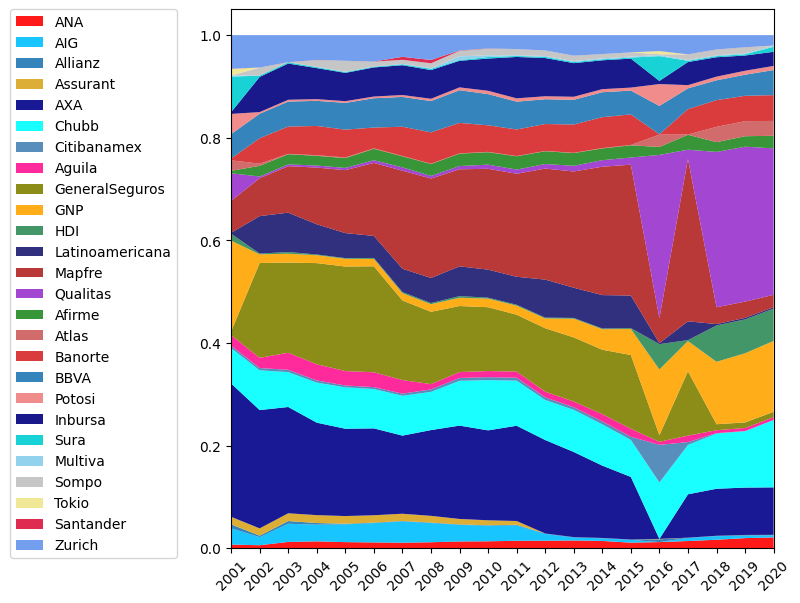

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = list(dict.fromkeys(DatosYear))
ANA=Comp_Dat[Comp_Dat['Nombre Institución']=='A.N.A. Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
AIG=Comp_Dat[Comp_Dat['Nombre Institución']=='AIG Seguros México, S.A. de C.V.']['Participación Prima Directa']
Allianz=Comp_Dat[Comp_Dat['Nombre Institución']=='Allianz México, S.A., Compañía de Seguros']['Participación Prima Directa']
Assurant=Comp_Dat[Comp_Dat['Nombre Institución']=='Assurant Daños México, S.A.']['Participación Prima Directa']
AXA=Comp_Dat[Comp_Dat['Nombre Institución']=='AXA Seguros']['Participación Prima Directa']
Chubb=Comp_Dat[Comp_Dat['Nombre Institución']=='Chubb Seguros México, S.A.']['Participación Prima Directa']
Citibanamex=Comp_Dat[Comp_Dat['Nombre Institución']=='Citibanamex Seguros, S.A. de C.V.']['Participación Prima Directa']
Agila=Comp_Dat[Comp_Dat['Nombre Institución']=='El Águila, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
GeneralSeguros=Comp_Dat[Comp_Dat['Nombre Institución']=='General de Seguros']['Participación Prima Directa']
GNP=Comp_Dat[Comp_Dat['Nombre Institución']=='Grupo Nacional Provincial, S.A.B.']['Participación Prima Directa']
HDI=Comp_Dat[Comp_Dat['Nombre Institución']=='HDI Seguros, S.A. de C.V.']['Participación Prima Directa']
Latinoamericana=Comp_Dat[Comp_Dat['Nombre Institución']=='La Latinoamericana Seguros, S.A.']['Participación Prima Directa']
Mapfre=Comp_Dat[Comp_Dat['Nombre Institución']=='Mapfre México']['Participación Prima Directa']
Qualitas=Comp_Dat[Comp_Dat['Nombre Institución']=='Quálitas, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
Afirme=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Afirme, S.A. de C.V.']['Participación Prima Directa']
Atlas=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Atlas, S.A.']['Participación Prima Directa']
Banorte=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Banorte, S.A. de C.V.']['Participación Prima Directa']
BBVA=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros BBVA Bancomer, S.A. de C.V.']['Participación Prima Directa']
Potosi=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros El Potosí, S.A.']['Participación Prima Directa']
Inbursa=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Inbursa, S.A.']['Participación Prima Directa']
Sura=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Sura, S.A. de C.V.']['Participación Prima Directa']
Multiva=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Multiva']['Participación Prima Directa']
Sompo=Comp_Dat[Comp_Dat['Nombre Institución']=='Sompo Seguros México, S.A. de C.V.']['Participación Prima Directa']
Tokio=Comp_Dat[Comp_Dat['Nombre Institución']=='Tokio Marine, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
Santander=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Santander ']['Participación Prima Directa']
Zurich=Comp_Dat[Comp_Dat['Nombre Institución']=='Zurich, Compañía de Seguros, S.A.']['Participación Prima Directa']

y = np.vstack([ANA, AIG, Allianz, Assurant, AXA, Chubb, Citibanamex, Agila , GeneralSeguros, GNP, HDI, Latinoamericana, Mapfre, Qualitas, Afirme, Atlas, Banorte, BBVA , Potosi, Inbursa, Sura, Multiva, Sompo, Tokio, Santander, Zurich])

# Array of colors
cols = ['#FF0000', '#00BFFF', '#1f77b4', '#DAA520','#00008B','#00FFFF', '#4682B4', '#FF1493', '#808000', '#FFA500', '#2E8B57', '#191970', '#B22222', '#9932CC', '#228B22', '#CD5C5C', '#d62728', '#1f77b4', '#F08080', '#000080', '#00CED1', '#87CEEB', '#C0C0C0', '#F0E68C', '#DC143C', '#6495ED']

# Gráfico de áreas apiladas
fig, ax = plt.subplots()

ax.stackplot(x, y, labels = ['ANA', 'AIG', 'Allianz', 'Assurant', 'AXA', 'Chubb', 'Citibanamex', 'Aguila', 'GeneralSeguros', 'GNP', 'HDI', 'Latinoamericana', 'Mapfre', 'Qualitas', 'Afirme', 'Atlas', 'Banorte', 'BBVA', 'Potosi', 'Inbursa', 'Sura', 'Multiva', 'Sompo', 'Tokio', 'Santander', 'Zurich'],
             #alpha = 0.9)
             colors = cols, alpha = 0.9)

# Legend
ax.legend(loc = 'upper right', bbox_to_anchor=(-0.1, 1), borderaxespad=0.)

# Límites de los ejes
ax.set(xlim = (min(x), max(x)), xticks = x)

plt.xticks(x, rotation=45)

plt.show()

In [27]:
promedio = {'Aseguradoras': list(dict.fromkeys(Predicciones['Nombre Institución'])), 'Valores': list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')}
promedio=df = pd.DataFrame(promedio)
promedio.at[0, 'Valores'] = np.mean(ANA)
promedio.at[1, 'Valores'] = np.mean(AIG)
promedio.at[2, 'Valores'] = np.mean(Allianz)
promedio.at[3, 'Valores'] = np.mean(Assurant)
promedio.at[4, 'Valores'] = np.mean(AXA)
promedio.at[5, 'Valores'] = np.mean(Chubb)
promedio.at[6, 'Valores'] = np.mean(Citibanamex)
promedio.at[7, 'Valores'] = np.mean(Agila)
promedio.at[8, 'Valores'] = np.mean(GeneralSeguros)
promedio.at[9, 'Valores'] = np.mean(GNP)
promedio.at[10, 'Valores'] = np.mean(HDI)
promedio.at[11, 'Valores'] = np.mean(Latinoamericana)
promedio.at[12, 'Valores'] = np.mean(Mapfre)
promedio.at[13, 'Valores'] = np.mean(Qualitas)
promedio.at[14, 'Valores'] = np.mean(Afirme)
promedio.at[15, 'Valores'] = np.mean(Atlas)
promedio.at[16, 'Valores'] = np.mean(Banorte)
promedio.at[17, 'Valores'] = np.mean(BBVA)
promedio.at[18, 'Valores'] = np.mean(Potosi)
promedio.at[19, 'Valores'] = np.mean(Inbursa)
promedio.at[20, 'Valores'] = np.mean(Sura)
promedio.at[21, 'Valores'] = np.mean(Multiva)
promedio.at[22, 'Valores'] = np.mean(Sompo)
promedio.at[23, 'Valores'] = np.mean(Tokio)
promedio.at[24, 'Valores'] = np.mean(Santander)
promedio.at[25, 'Valores'] = np.mean(Zurich)
promedio_ordenado = promedio.sort_values(by='Valores', ascending=False)
promedio_ordenado

,Aseguradoras,Valores
4,AXA Seguros,0.152496
12,Mapfre México,0.148708
8,General de Seguros,0.116164
5,"Chubb Seguros México, S.A.",0.087084
13,"Quálitas, Compañía de Seguros, S.A. de C.V.",0.069029
9,"Grupo Nacional Provincial, S.A.B.",0.053135
19,"Seguros Inbursa, S.A.",0.051112
17,"Seguros BBVA Bancomer, S.A. de C.V.",0.050758
16,"Seguros Banorte, S.A. de C.V.",0.048379
11,"La Latinoamericana Seguros, S.A.",0.043571


In [30]:
Datos_filtrado = Comp_Dat.sort_values(by='Participación Prima Directa', ascending=False)
Datos_filtrado['Posicion_Año'] =  Datos_filtrado.groupby('YEAR').cumcount() + 1
Datos_filtrado=Datos_filtrado.sort_values(by=['Nombre Institución','YEAR'])
Datos_filtrado

,YEAR,Nombre Institución,Participación Prima Directa,Prima Directa,Incremento neto a reserva de riesgos en curso,Prima de retención devengada,Costo de adquisición,Costo de siniestralidad,Utilidad (Pérdida) técnica,Utilidad (Pérdida) bruta,Costo de operación,Utilidad (Pérdida) por operación,Resultado integral de Financ. Prod. Financieros,Utilidad (Pérdida) antes de imp,Utilidad (Pérdida) antes de op. Discont,Utilidad (Pérdida) del ejercicio,Posicion_Año
494,2001,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.007553,1.918240e+05,27284.00000,1.645400e+05,4.326000e+04,1.265920e+05,-5312.00000,-9689.00000,16574.00000,-26263.00000,11888.00000,-14375.00000,138.00000,-14513.00000,17
468,2002,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.006293,1.860499e+05,-9991.16223,1.960410e+05,4.378656e+04,1.664418e+05,-14187.38724,1135.35098,14890.85570,-13755.50472,5498.52515,-8256.97957,135.46906,-8392.44863,16
442,2003,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.012712,4.022209e+05,28367.07870,2.593533e+05,5.202891e+04,1.912997e+05,16024.71989,16024.71989,49586.17062,-33561.45073,8693.41826,-24868.03247,142.03807,-25010.07054,15
416,2004,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.013811,4.719098e+05,-5929.17348,2.713442e+05,4.423414e+04,1.860865e+05,41023.59147,41023.59147,81806.94714,-40783.35567,20214.41223,-20568.94344,-537.45188,-20031.49156,15
390,2005,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.012339,4.436554e+05,-5158.14061,2.657542e+05,6.001954e+04,1.857546e+05,19980.06729,19980.06729,79318.63857,-59338.57128,21670.11825,-37668.45303,655.34225,-38323.79528,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2016,"Zurich, Compañía de Seguros, S.A.",0.031040,2.805321e+06,302512.90496,2.113539e+06,9.078120e+05,1.148360e+06,57366.93499,212098.46786,161021.72134,51076.74652,124994.52272,176069.69402,173022.41180,173022.41180,10
103,2017,"Zurich, Compañía de Seguros, S.A.",0.037363,3.795827e+06,742976.49440,2.632977e+06,1.228441e+06,1.713302e+06,-308766.46930,-139295.31838,144462.18589,-283757.50427,44900.15059,-236177.48835,-238070.35477,-238070.35477,9
77,2018,"Zurich, Compañía de Seguros, S.A.",0.027902,3.026472e+06,-211165.97340,2.718333e+06,9.386152e+05,2.034874e+06,-255156.26098,-118184.60488,160750.59687,-278935.20175,97161.46615,-187109.54403,-172155.34782,-172155.34782,11
51,2019,"Zurich, Compañía de Seguros, S.A.",0.023639,2.682239e+06,-326570.47771,2.563935e+06,7.621541e+05,1.575640e+06,226140.64667,359424.84596,154108.77208,205316.07388,71603.39599,280365.51642,242955.02678,242955.02678,11


## Top

In [31]:
Top=list(promedio_ordenado['Aseguradoras'][0:13])
Top

['AXA Seguros',
 'Mapfre México',
 'General de Seguros',
 'Chubb Seguros México, S.A.',
 'Quálitas, Compañía de Seguros, S.A. de C.V.',
 'Grupo Nacional Provincial, S.A.B.',
 'Seguros Inbursa, S.A.',
 'Seguros BBVA Bancomer, S.A. de C.V.',
 'Seguros Banorte, S.A. de C.V.',
 'La Latinoamericana Seguros, S.A.',
 'Zurich, Compañía de Seguros, S.A.',
 'Seguros Afirme, S.A. de C.V.',
 'AIG Seguros México, S.A. de C.V.']

In [32]:
Comp_Dat_filtrado_Top = Datos_filtrado[Datos_filtrado['Nombre Institución'].isin(Top)][['YEAR', 'Nombre Institución','Participación Prima Directa','Posicion_Año']]

Comp_Dat_filtrado_Top

,YEAR,Nombre Institución,Participación Prima Directa,Posicion_Año
495,2001,"AIG Seguros México, S.A. de C.V.",0.031650,10
469,2002,"AIG Seguros México, S.A. de C.V.",0.015790,13
443,2003,"AIG Seguros México, S.A. de C.V.",0.035402,10
417,2004,"AIG Seguros México, S.A. de C.V.",0.032562,10
391,2005,"AIG Seguros México, S.A. de C.V.",0.034643,10
...,...,...,...,...
129,2016,"Zurich, Compañía de Seguros, S.A.",0.031040,10
103,2017,"Zurich, Compañía de Seguros, S.A.",0.037363,9
77,2018,"Zurich, Compañía de Seguros, S.A.",0.027902,11
51,2019,"Zurich, Compañía de Seguros, S.A.",0.023639,11


In [ ]:
list(Top_filtrado['Posicion_Año'])[12]

13

In [ ]:
list(range(0, Top_filtrado.shape[0], 20))

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]

In [ ]:
list(range(0,19))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
def MatDeTran(datos,n,m,pos,NombreColPos):
  matriz_Trans=pd.DataFrame(np.zeros((pos, pos)))
  matriz_Trans.columns = range(1, pos+1)
  matriz_Trans.index = range(1, pos+1)
  Vect = list(datos[NombreColPos])
  for i in range(0, datos.shape[0], m):
    for j in range(i,i+m-1):
       matriz_Trans.iloc[Vect[j]-1,Vect[j+1]-1]=matriz_Trans.iloc[Vect[j]-1,Vect[j+1]-1]+1
  matriz_Trans=matriz_Trans.divide(matriz_Trans.sum(axis=1), axis=0)
  matriz_Trans = matriz_Trans.fillna(0).replace([np.inf, -np.inf], 0)

  return(matriz_Trans)

In [ ]:
Transicion_Top=MatDeTran(Comp_Dat_filtrado_Top,13,20,26,'Posicion_Año')
Transicion_Top

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
1,0.736842,0.105263,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
2,0.052632,0.578947,0.157895,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
3,0.055556,0.111111,0.722222,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000,0.055556
4,0.000000,0.000000,0.166667,0.777778,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
5,0.000000,0.058824,0.000000,0.058824,0.529412,0.117647,0.117647,0.058824,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.058824,0.0,0.0,0.000000,0.0,0.000,0.000000
6,0.000000,0.000000,0.000000,0.111111,0.111111,0.444444,0.111111,0.055556,0.111111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.055556,0.0,0.000,0.000000
7,0.052632,0.000000,0.000000,0.000000,0.052632,0.210526,0.315789,0.210526,0.052632,0.000000,...,0.000000,0.000000,0.000000,0.052632,0.0,0.0,0.000000,0.0,0.000,0.000000
8,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.333333,0.277778,0.222222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.294118,0.352941,0.117647,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235294,0.529412,...,0.000000,0.000000,0.058824,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000


In [ ]:
Transicion_Top.sum(axis=1)

1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
dtype: float64

## Bottom

In [ ]:
Bot=list(promedio_ordenado['Aseguradoras'][13:])
Bot

['El Águila, Compañía de Seguros, S.A. de C.V.',
 'HDI Seguros, S.A. de C.V.',
 'A.N.A. Compañía de Seguros, S.A. de C.V.',
 'Sompo Seguros México, S.A. de C.V.',
 'Seguros El Potosí, S.A.',
 'Seguros Sura, S.A. de C.V.',
 'Citibanamex Seguros, S.A. de C.V.',
 'Seguros Atlas, S.A.',
 'Assurant Daños México, S.A.',
 'Allianz México, S.A., Compañía de Seguros',
 'Seguros Multiva',
 'Tokio Marine, Compañía de Seguros, S.A. de C.V.',
 'Seguros Santander ']

In [ ]:
Comp_Dat_filtrado_Bot = Datos_filtrado[Datos_filtrado['Nombre Institución'].isin(Bot)][['YEAR', 'Nombre Institución','Participación Prima Directa','Posicion_Año']]

Comp_Dat_filtrado_Bot

,YEAR,Nombre Institución,Participación Prima Directa,Posicion_Año
494,2001,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.007553,17
468,2002,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.006293,16
442,2003,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.012712,15
416,2004,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.013811,15
390,2005,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.012339,16
...,...,...,...,...
127,2016,"Tokio Marine, Compañía de Seguros, S.A. de C.V.",0.006060,16
101,2017,"Tokio Marine, Compañía de Seguros, S.A. de C.V.",0.000018,25
75,2018,"Tokio Marine, Compañía de Seguros, S.A. de C.V.",0.000015,26
49,2019,"Tokio Marine, Compañía de Seguros, S.A. de C.V.",0.000010,26


In [ ]:
Transicion_Bot=MatDeTran(Comp_Dat_filtrado_Bot,13,20,26,'Posicion_Año')
Transicion_Bot

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
1,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.0,0.000000,1.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.0,0.500000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
Transicion_Bot.sum(axis=1)

1     0.0
2     0.0
3     1.0
4     1.0
5     1.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
dtype: float64

## General

In [ ]:
Comp_Dat_filtrado_Gen = Datos_filtrado[['YEAR', 'Nombre Institución','Participación Prima Directa','Posicion_Año']]

Comp_Dat_filtrado_Gen

,YEAR,Nombre Institución,Participación Prima Directa,Posicion_Año
494,2001,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.007553,17
468,2002,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.006293,16
442,2003,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.012712,15
416,2004,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.013811,15
390,2005,"A.N.A. Compañía de Seguros, S.A. de C.V.",0.012339,16
...,...,...,...,...
129,2016,"Zurich, Compañía de Seguros, S.A.",0.031040,10
103,2017,"Zurich, Compañía de Seguros, S.A.",0.037363,9
77,2018,"Zurich, Compañía de Seguros, S.A.",0.027902,11
51,2019,"Zurich, Compañía de Seguros, S.A.",0.023639,11


In [ ]:
Transicion_Gen=MatDeTran(Comp_Dat_filtrado_Gen,26,20,26,'Posicion_Año')
Transicion_Gen

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
1,0.736842,0.105263,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.052632,0.578947,0.157895,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.052632,0.105263,0.684211,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632
4,0.000000,0.000000,0.157895,0.736842,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.052632,0.000000,0.052632,0.578947,0.105263,0.105263,0.052632,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.105263,0.105263,0.421053,0.105263,0.052632,0.105263,0.000000,...,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000
7,0.052632,0.000000,0.000000,0.000000,0.052632,0.210526,0.315789,0.210526,0.052632,0.000000,...,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.315789,0.263158,0.210526,0.000000,...,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.263158,0.315789,0.105263,...,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.210526,0.526316,...,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
Transicion_Gen.sum(axis=1)

1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
dtype: float64

## Gráficas

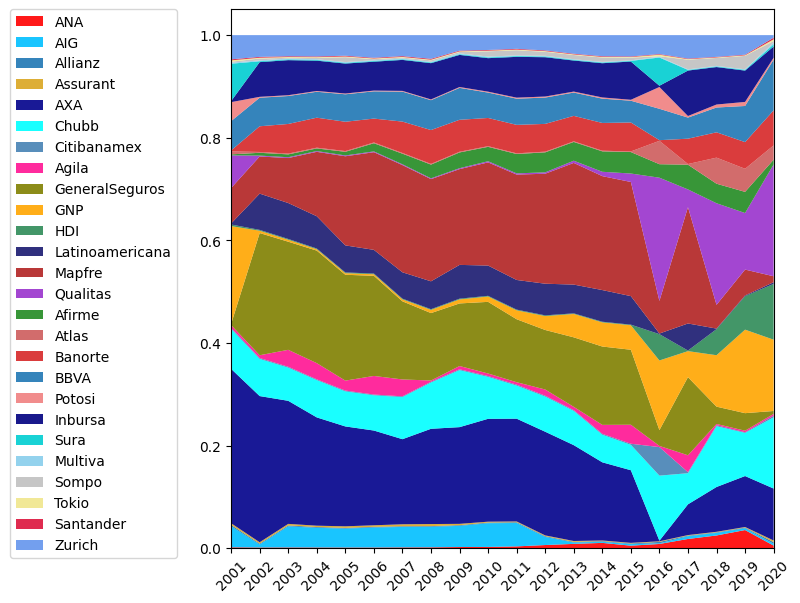

In [ ]:
x = list(dict.fromkeys(DatosYear))
ANA=Predicciones[Predicciones['Nombre Institución']=='A.N.A. Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
AIG=Predicciones[Predicciones['Nombre Institución']=='AIG Seguros México, S.A. de C.V.']['Participación Prima Directa']
Allianz=Predicciones[Predicciones['Nombre Institución']=='Allianz México, S.A., Compañía de Seguros']['Participación Prima Directa']
Assurant=Predicciones[Predicciones['Nombre Institución']=='Assurant Daños México, S.A.']['Participación Prima Directa']
AXA=Predicciones[Predicciones['Nombre Institución']=='AXA Seguros']['Participación Prima Directa']
Chubb=Predicciones[Predicciones['Nombre Institución']=='Chubb Seguros México, S.A.']['Participación Prima Directa']
Citibanamex=Predicciones[Predicciones['Nombre Institución']=='Citibanamex Seguros, S.A. de C.V.']['Participación Prima Directa']
Agila=Predicciones[Predicciones['Nombre Institución']=='El Águila, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
GeneralSeguros=Predicciones[Predicciones['Nombre Institución']=='General de Seguros']['Participación Prima Directa']
GNP=Predicciones[Predicciones['Nombre Institución']=='Grupo Nacional Provincial, S.A.B.']['Participación Prima Directa']
HDI=Predicciones[Predicciones['Nombre Institución']=='HDI Seguros, S.A. de C.V.']['Participación Prima Directa']
Latinoamericana=Predicciones[Predicciones['Nombre Institución']=='La Latinoamericana Seguros, S.A.']['Participación Prima Directa']
Mapfre=Predicciones[Predicciones['Nombre Institución']=='Mapfre México']['Participación Prima Directa']
Qualitas=Predicciones[Predicciones['Nombre Institución']=='Quálitas, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
Afirme=Predicciones[Predicciones['Nombre Institución']=='Seguros Afirme, S.A. de C.V.']['Participación Prima Directa']
Atlas=Predicciones[Predicciones['Nombre Institución']=='Seguros Atlas, S.A.']['Participación Prima Directa']
Banorte=Predicciones[Predicciones['Nombre Institución']=='Seguros Banorte, S.A. de C.V.']['Participación Prima Directa']
BBVA=Predicciones[Predicciones['Nombre Institución']=='Seguros BBVA Bancomer, S.A. de C.V.']['Participación Prima Directa']
Potosi=Predicciones[Predicciones['Nombre Institución']=='Seguros El Potosí, S.A.']['Participación Prima Directa']
Inbursa=Predicciones[Predicciones['Nombre Institución']=='Seguros Inbursa, S.A.']['Participación Prima Directa']
Sura=Predicciones[Predicciones['Nombre Institución']=='Seguros Sura, S.A. de C.V.']['Participación Prima Directa']
Multiva=Predicciones[Predicciones['Nombre Institución']=='Seguros Multiva']['Participación Prima Directa']
Sompo=Predicciones[Predicciones['Nombre Institución']=='Sompo Seguros México, S.A. de C.V.']['Participación Prima Directa']
Tokio=Predicciones[Predicciones['Nombre Institución']=='Tokio Marine, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
Santander=Predicciones[Predicciones['Nombre Institución']=='Seguros Santander ']['Participación Prima Directa']
Zurich=Predicciones[Predicciones['Nombre Institución']=='Zurich, Compañía de Seguros, S.A.']['Participación Prima Directa']

y = np.vstack([ANA, AIG, Allianz, Assurant, AXA, Chubb, Citibanamex, Agila , GeneralSeguros, GNP, HDI, Latinoamericana, Mapfre, Qualitas, Afirme, Atlas, Banorte, BBVA , Potosi, Inbursa, Sura, Multiva, Sompo, Tokio, Santander, Zurich])

# Array of colors
cols = ['#FF0000', '#00BFFF', '#1f77b4', '#DAA520','#00008B','#00FFFF', '#4682B4', '#FF1493', '#808000', '#FFA500', '#2E8B57', '#191970', '#B22222', '#9932CC', '#228B22', '#CD5C5C', '#d62728', '#1f77b4', '#F08080', '#000080', '#00CED1', '#87CEEB', '#C0C0C0', '#F0E68C', '#DC143C', '#6495ED']

# Gráfico de áreas apiladas
fig, ax = plt.subplots()

ax.stackplot(x, y, labels = ['ANA', 'AIG', 'Allianz', 'Assurant', 'AXA', 'Chubb', 'Citibanamex', 'Aguila', 'GeneralSeguros', 'GNP', 'HDI', 'Latinoamericana', 'Mapfre', 'Qualitas', 'Afirme', 'Atlas', 'Banorte', 'BBVA', 'Potosi', 'Inbursa', 'Sura', 'Multiva', 'Sompo', 'Tokio', 'Santander', 'Zurich'],
             #alpha = 0.9)
             colors = cols, alpha = 0.9)

# Legend
ax.legend(loc = 'upper right', bbox_to_anchor=(-0.1, 1), borderaxespad=0.)

# Límites de los ejes
ax.set(xlim = (min(x), max(x)), xticks = x)

plt.xticks(x, rotation=45)

plt.show()

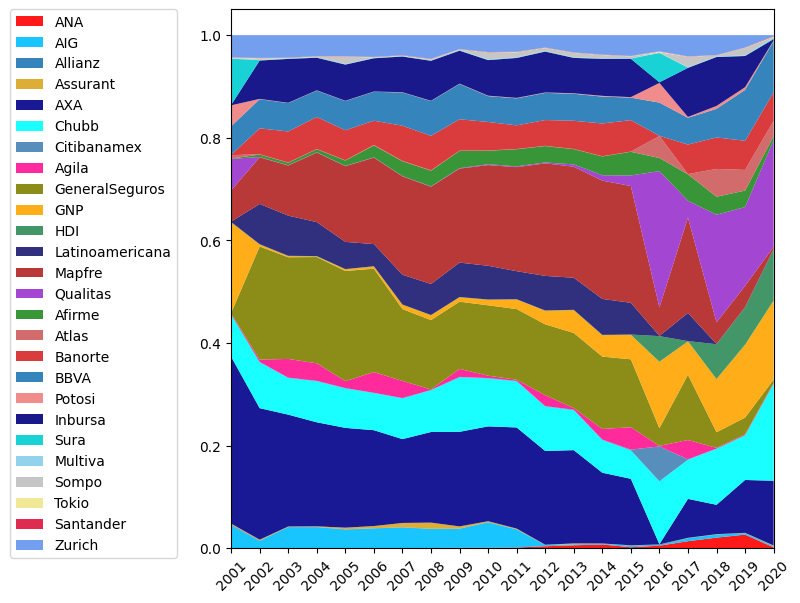

In [ ]:
x = list(dict.fromkeys(DatosYear))
ANA=Predicciones[Predicciones['Nombre Institución']=='A.N.A. Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
AIG=Predicciones[Predicciones['Nombre Institución']=='AIG Seguros México, S.A. de C.V.']['Participación Prima Directa']
Allianz=Predicciones[Predicciones['Nombre Institución']=='Allianz México, S.A., Compañía de Seguros']['Participación Prima Directa']
Assurant=Predicciones[Predicciones['Nombre Institución']=='Assurant Daños México, S.A.']['Participación Prima Directa']
AXA=Predicciones[Predicciones['Nombre Institución']=='AXA Seguros']['Participación Prima Directa']
Chubb=Predicciones[Predicciones['Nombre Institución']=='Chubb Seguros México, S.A.']['Participación Prima Directa']
Citibanamex=Predicciones[Predicciones['Nombre Institución']=='Citibanamex Seguros, S.A. de C.V.']['Participación Prima Directa']
Agila=Predicciones[Predicciones['Nombre Institución']=='El Águila, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
GeneralSeguros=Predicciones[Predicciones['Nombre Institución']=='General de Seguros']['Participación Prima Directa']
GNP=Predicciones[Predicciones['Nombre Institución']=='Grupo Nacional Provincial, S.A.B.']['Participación Prima Directa']
HDI=Predicciones[Predicciones['Nombre Institución']=='HDI Seguros, S.A. de C.V.']['Participación Prima Directa']
Latinoamericana=Predicciones[Predicciones['Nombre Institución']=='La Latinoamericana Seguros, S.A.']['Participación Prima Directa']
Mapfre=Predicciones[Predicciones['Nombre Institución']=='Mapfre México']['Participación Prima Directa']
Qualitas=Predicciones[Predicciones['Nombre Institución']=='Quálitas, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
Afirme=Predicciones[Predicciones['Nombre Institución']=='Seguros Afirme, S.A. de C.V.']['Participación Prima Directa']
Atlas=Predicciones[Predicciones['Nombre Institución']=='Seguros Atlas, S.A.']['Participación Prima Directa']
Banorte=Predicciones[Predicciones['Nombre Institución']=='Seguros Banorte, S.A. de C.V.']['Participación Prima Directa']
BBVA=Predicciones[Predicciones['Nombre Institución']=='Seguros BBVA Bancomer, S.A. de C.V.']['Participación Prima Directa']
Potosi=Predicciones[Predicciones['Nombre Institución']=='Seguros El Potosí, S.A.']['Participación Prima Directa']
Inbursa=Predicciones[Predicciones['Nombre Institución']=='Seguros Inbursa, S.A.']['Participación Prima Directa']
Sura=Predicciones[Predicciones['Nombre Institución']=='Seguros Sura, S.A. de C.V.']['Participación Prima Directa']
Multiva=Predicciones[Predicciones['Nombre Institución']=='Seguros Multiva']['Participación Prima Directa']
Sompo=Predicciones[Predicciones['Nombre Institución']=='Sompo Seguros México, S.A. de C.V.']['Participación Prima Directa']
Tokio=Predicciones[Predicciones['Nombre Institución']=='Tokio Marine, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
Santander=Predicciones[Predicciones['Nombre Institución']=='Seguros Santander ']['Participación Prima Directa']
Zurich=Predicciones[Predicciones['Nombre Institución']=='Zurich, Compañía de Seguros, S.A.']['Participación Prima Directa']

y = np.vstack([ANA, AIG, Allianz, Assurant, AXA, Chubb, Citibanamex, Agila , GeneralSeguros, GNP, HDI, Latinoamericana, Mapfre, Qualitas, Afirme, Atlas, Banorte, BBVA , Potosi, Inbursa, Sura, Multiva, Sompo, Tokio, Santander, Zurich])

# Array of colors
cols = ['#FF0000', '#00BFFF', '#1f77b4', '#DAA520','#00008B','#00FFFF', '#4682B4', '#FF1493', '#808000', '#FFA500', '#2E8B57', '#191970', '#B22222', '#9932CC', '#228B22', '#CD5C5C', '#d62728', '#1f77b4', '#F08080', '#000080', '#00CED1', '#87CEEB', '#C0C0C0', '#F0E68C', '#DC143C', '#6495ED']

# Gráfico de áreas apiladas
fig, ax = plt.subplots()

ax.stackplot(x, y, labels = ['ANA', 'AIG', 'Allianz', 'Assurant', 'AXA', 'Chubb', 'Citibanamex', 'Agila', 'GeneralSeguros', 'GNP', 'HDI', 'Latinoamericana', 'Mapfre', 'Qualitas', 'Afirme', 'Atlas', 'Banorte', 'BBVA', 'Potosi', 'Inbursa', 'Sura', 'Multiva', 'Sompo', 'Tokio', 'Santander', 'Zurich'],
             #alpha = 0.9)
             colors = cols, alpha = 0.9)

# Legend
ax.legend(loc = 'upper right', bbox_to_anchor=(-0.1, 1), borderaxespad=0.)

# Límites de los ejes
ax.set(xlim = (min(x), max(x)), xticks = x)

plt.xticks(x, rotation=45)

plt.show()

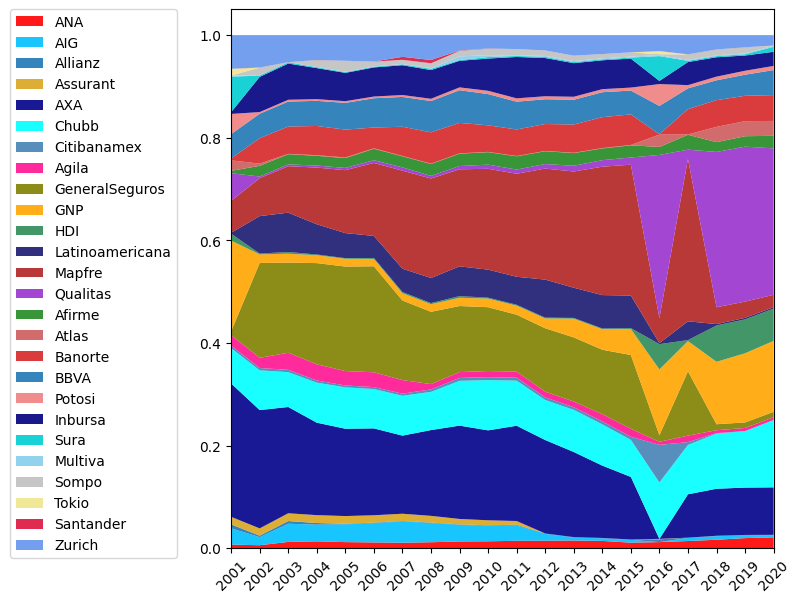

In [ ]:
# Datos
x = list(dict.fromkeys(DatosYear))
ANA=Comp_Dat[Comp_Dat['Nombre Institución']=='A.N.A. Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
AIG=Comp_Dat[Comp_Dat['Nombre Institución']=='AIG Seguros México, S.A. de C.V.']['Participación Prima Directa']
Allianz=Comp_Dat[Comp_Dat['Nombre Institución']=='Allianz México, S.A., Compañía de Seguros']['Participación Prima Directa']
Assurant=Comp_Dat[Comp_Dat['Nombre Institución']=='Assurant Daños México, S.A.']['Participación Prima Directa']
AXA=Comp_Dat[Comp_Dat['Nombre Institución']=='AXA Seguros']['Participación Prima Directa']
Chubb=Comp_Dat[Comp_Dat['Nombre Institución']=='Chubb Seguros México, S.A.']['Participación Prima Directa']
Citibanamex=Comp_Dat[Comp_Dat['Nombre Institución']=='Citibanamex Seguros, S.A. de C.V.']['Participación Prima Directa']
Agila=Comp_Dat[Comp_Dat['Nombre Institución']=='El Águila, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
GeneralSeguros=Comp_Dat[Comp_Dat['Nombre Institución']=='General de Seguros']['Participación Prima Directa']
GNP=Comp_Dat[Comp_Dat['Nombre Institución']=='Grupo Nacional Provincial, S.A.B.']['Participación Prima Directa']
HDI=Comp_Dat[Comp_Dat['Nombre Institución']=='HDI Seguros, S.A. de C.V.']['Participación Prima Directa']
Latinoamericana=Comp_Dat[Comp_Dat['Nombre Institución']=='La Latinoamericana Seguros, S.A.']['Participación Prima Directa']
Mapfre=Comp_Dat[Comp_Dat['Nombre Institución']=='Mapfre México']['Participación Prima Directa']
Qualitas=Comp_Dat[Comp_Dat['Nombre Institución']=='Quálitas, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
Afirme=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Afirme, S.A. de C.V.']['Participación Prima Directa']
Atlas=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Atlas, S.A.']['Participación Prima Directa']
Banorte=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Banorte, S.A. de C.V.']['Participación Prima Directa']
BBVA=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros BBVA Bancomer, S.A. de C.V.']['Participación Prima Directa']
Potosi=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros El Potosí, S.A.']['Participación Prima Directa']
Inbursa=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Inbursa, S.A.']['Participación Prima Directa']
Sura=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Sura, S.A. de C.V.']['Participación Prima Directa']
Multiva=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Multiva']['Participación Prima Directa']
Sompo=Comp_Dat[Comp_Dat['Nombre Institución']=='Sompo Seguros México, S.A. de C.V.']['Participación Prima Directa']
Tokio=Comp_Dat[Comp_Dat['Nombre Institución']=='Tokio Marine, Compañía de Seguros, S.A. de C.V.']['Participación Prima Directa']
Santander=Comp_Dat[Comp_Dat['Nombre Institución']=='Seguros Santander ']['Participación Prima Directa']
Zurich=Comp_Dat[Comp_Dat['Nombre Institución']=='Zurich, Compañía de Seguros, S.A.']['Participación Prima Directa']

y = np.vstack([ANA, AIG, Allianz, Assurant, AXA, Chubb, Citibanamex, Agila , GeneralSeguros, GNP, HDI, Latinoamericana, Mapfre, Qualitas, Afirme, Atlas, Banorte, BBVA , Potosi, Inbursa, Sura, Multiva, Sompo, Tokio, Santander, Zurich])

# Array of colors
cols = ['#FF0000', '#00BFFF', '#1f77b4', '#DAA520','#00008B','#00FFFF', '#4682B4', '#FF1493', '#808000', '#FFA500', '#2E8B57', '#191970', '#B22222', '#9932CC', '#228B22', '#CD5C5C', '#d62728', '#1f77b4', '#F08080', '#000080', '#00CED1', '#87CEEB', '#C0C0C0', '#F0E68C', '#DC143C', '#6495ED']

# Gráfico de áreas apiladas
fig, ax = plt.subplots()

ax.stackplot(x, y, labels = ['ANA', 'AIG', 'Allianz', 'Assurant', 'AXA', 'Chubb', 'Citibanamex', 'Agila', 'GeneralSeguros', 'GNP', 'HDI', 'Latinoamericana', 'Mapfre', 'Qualitas', 'Afirme', 'Atlas', 'Banorte', 'BBVA', 'Potosi', 'Inbursa', 'Sura', 'Multiva', 'Sompo', 'Tokio', 'Santander', 'Zurich'],
             #alpha = 0.9)
             colors = cols, alpha = 0.9)

# Legend
ax.legend(loc = 'upper right', bbox_to_anchor=(-0.1, 1), borderaxespad=0.)

# Límites de los ejes
ax.set(xlim = (min(x), max(x)), xticks = x)

plt.xticks(x, rotation=45)

plt.show()